In [23]:
from functions import *
from features_dupe import *
import seaborn as sns
import matplotlib.pyplot as plt

# extract subnational population data from census website

In [2]:
png_pops = extract_census_data('papuanewguinea-adm3')

In [3]:
png_pops

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM3 Name,ADM3 Population 2020
3,PAPUA NEW GUINEA,PNG_01_01_01,WESTERN,MIDDLE FLY,BALIMO URBAN,5329
4,PAPUA NEW GUINEA,PNG_01_01_02,WESTERN,MIDDLE FLY,BAMU RURAL,18585
5,PAPUA NEW GUINEA,PNG_01_01_03,WESTERN,MIDDLE FLY,GOGODALA RURAL,39293
6,PAPUA NEW GUINEA,PNG_01_01_04,WESTERN,MIDDLE FLY,LAKE MURRAY RURAL,18212
7,PAPUA NEW GUINEA,PNG_01_01_05,WESTERN,MIDDLE FLY,NOMAD RURAL,16419
...,...,...,...,...,...,...
430,PAPUA NEW GUINEA,PNG_22_02_02,BOUGAINVILLE,CENTRAL BOUGAINVILLE,ARAWA RURAL,55279
432,PAPUA NEW GUINEA,PNG_22_03_01,BOUGAINVILLE,SOUTH BOUGAINVILLE,BUIN RURAL,41232
433,PAPUA NEW GUINEA,PNG_22_03_02,BOUGAINVILLE,SOUTH BOUGAINVILLE,SIWAI RURAL,19936
434,PAPUA NEW GUINEA,PNG_22_03_03,BOUGAINVILLE,SOUTH BOUGAINVILLE,BANA RURAL,28974


# read papua new guinea ADM3 shapefile 

In [4]:
png_shapes = gpd.read_file('./png/Papua_New_Guinea_adm3_uscb_2022.shp')[['GEO_MATCH', 'geometry']]

In [5]:
png_shapes

,GEO_MATCH,geometry
0,PNG_22_02_02,"MULTIPOLYGON (((155.97471 -6.46014, 155.97385 ..."
1,PNG_22_02_01,"POLYGON ((155.16962 -5.72374, 155.17011 -5.724..."
2,PNG_22_01_06,"MULTIPOLYGON (((155.45486 -4.78356, 155.45458 ..."
3,PNG_22_01_04,"MULTIPOLYGON (((154.65290 -5.44709, 154.65233 ..."
4,PNG_22_01_02,"MULTIPOLYGON (((154.60598 -5.73165, 154.60512 ..."
...,...,...
321,PNG_01_02_05,"POLYGON ((141.34480 -5.11405, 141.49616 -5.164..."
322,PNG_01_03_01,"POLYGON ((143.21356 -9.06309, 143.21912 -9.065..."
323,PNG_01_03_02,"MULTIPOLYGON (((142.72210 -9.31019, 142.71991 ..."
324,PNG_01_03_03,"MULTIPOLYGON (((142.14709 -8.23298, 142.14490 ..."


# merge dataframes together

In [6]:
png_complete = png_pops.merge(png_shapes, left_on='GEO_MATCH', right_on='GEO_MATCH', how='inner')

In [7]:
png_complete

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM3 Name,ADM3 Population 2020,geometry
0,PAPUA NEW GUINEA,PNG_01_01_01,WESTERN,MIDDLE FLY,BALIMO URBAN,5329,"POLYGON ((142.96130 -8.03077, 142.96679 -8.032..."
1,PAPUA NEW GUINEA,PNG_01_01_02,WESTERN,MIDDLE FLY,BAMU RURAL,18585,"MULTIPOLYGON (((143.62059 -8.17870, 143.62125 ..."
2,PAPUA NEW GUINEA,PNG_01_01_03,WESTERN,MIDDLE FLY,GOGODALA RURAL,39293,"MULTIPOLYGON (((142.92813 -8.39891, 142.92432 ..."
3,PAPUA NEW GUINEA,PNG_01_01_04,WESTERN,MIDDLE FLY,LAKE MURRAY RURAL,18212,"POLYGON ((141.42013 -6.17797, 141.42446 -6.181..."
4,PAPUA NEW GUINEA,PNG_01_01_05,WESTERN,MIDDLE FLY,NOMAD RURAL,16419,"POLYGON ((142.52859 -5.84278, 142.53149 -5.841..."
...,...,...,...,...,...,...,...
321,PAPUA NEW GUINEA,PNG_22_02_02,BOUGAINVILLE,CENTRAL BOUGAINVILLE,ARAWA RURAL,55279,"MULTIPOLYGON (((155.97471 -6.46014, 155.97385 ..."
322,PAPUA NEW GUINEA,PNG_22_03_01,BOUGAINVILLE,SOUTH BOUGAINVILLE,BUIN RURAL,41232,"MULTIPOLYGON (((155.71082 -6.89711, 155.70995 ..."
323,PAPUA NEW GUINEA,PNG_22_03_02,BOUGAINVILLE,SOUTH BOUGAINVILLE,SIWAI RURAL,19936,"POLYGON ((155.60909 -6.58789, 155.57763 -6.598..."
324,PAPUA NEW GUINEA,PNG_22_03_03,BOUGAINVILLE,SOUTH BOUGAINVILLE,BANA RURAL,28974,"POLYGON ((155.40036 -6.35496, 155.58671 -6.480..."


# apply validation code

In [8]:
png_complete = gpd.GeoDataFrame(png_complete)
png = validate_png(png_complete, verbose=True)

Processing input data
Finding overlapping polygons
The Sinasina people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Emira people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Kate people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Asaro people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Central Buang people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Manam people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Ngalum people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Vitu people group had a population greater than all ADM3 boundaries they intersected. They are invalid.
The Duke of York Islander people group had a population greater tha

In [9]:
png

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM3 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
123,Daga,PNG,15500,Papua New Guinea,"MULTIPOLYGON (((149.03238 -9.78064, 149.06104 ...","[AMAZON BAY RURAL, CLOUDY BAY RURAL, MAKAMAKA ...",57162,True,27.115916
131,Podopa,PNG,8800,Papua New Guinea,"MULTIPOLYGON (((144.20229 -6.70069, 144.23075 ...","[BAIMURU RURAL, EAST KIKORI RURAL, ERAVE RURAL...",73460,True,11.979308
153,Suena,PNG,6200,Papua New Guinea,"MULTIPOLYGON (((147.42047 -7.57135, 147.42359 ...",[MOROBE RURAL],15003,True,41.325068
161,Saki,PNG,8800,Papua New Guinea,"MULTIPOLYGON (((145.06379 -4.38197, 145.08344 ...",[ALMAMI RURAL],27218,True,32.331545
168,Dimir,PNG,7300,Papua New Guinea,"MULTIPOLYGON (((145.70354 -4.87199, 145.64807 ...",[SUMGILBAR RURAL],41347,True,17.655453
...,...,...,...,...,...,...,...,...,...
10347,Ningil,PNG,2000,Papua New Guinea,"MULTIPOLYGON (((142.26104 -3.48999, 142.26758 ...",[YANGKOK RURAL],18717,True,10.685473
10348,Sirak,PNG,500,Papua New Guinea,"MULTIPOLYGON (((146.82368 -6.45796, 146.81511 ...",[WAIN-ERAP RURAL],23015,True,2.172496
10353,Tench,PNG,325,Papua New Guinea,"MULTIPOLYGON (((150.67659 -1.64708, 150.67635 ...",[MURAT RURAL],4420,True,7.352941
10364,Munkip,PNG,1100,Papua New Guinea,"MULTIPOLYGON (((146.73173 -6.50560, 146.73080 ...","[WAMPAR RURAL, WAIN-ERAP RURAL]",84851,True,1.296390


# results

* test worked at the ADM3 level for Papua New Guinea
* interesting results ~ 15 people groups are invalid (due to potentially large/inflated population numbers)
* not sure if replicable for all people groups. method heavily relied on data avaiable through the Spatial Data Respository.

### PNG people groups with greatest population difference (>100% of total boundary population) 

In [54]:
png_sorted = png.sort_values(by='Percent Boundary Population', ascending=False)
png_sorted.head()

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM3 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
8873,Detribalized Papuan,PNG,1595000,Papua New Guinea,"MULTIPOLYGON (((147.27890 -9.31565, 147.30029 ...","[HIRI RURAL, KOIARI RURAL, NATIONAL CAPITAL]",536924,False,297.062527
3966,Ngalum,PNG,27500,Papua New Guinea,"MULTIPOLYGON (((140.99966 -4.55382, 141.02735 ...",[YAPSIE RURAL],10939,False,251.394095
3802,Central Buang,PNG,17500,Papua New Guinea,"MULTIPOLYGON (((146.76092 -6.93465, 146.75787 ...",[BUANG RURAL],7515,False,232.867598
7229,Wuvulu-Aua,PNG,3100,Papua New Guinea,"MULTIPOLYGON (((142.86233 -1.72734, 142.87084 ...",[AUA WUVULU RURAL],1533,False,202.217873
3027,Emira,PNG,7900,Papua New Guinea,"MULTIPOLYGON (((149.56617 -1.31925, 149.56661 ...",[MURAT RURAL],4420,False,178.733032


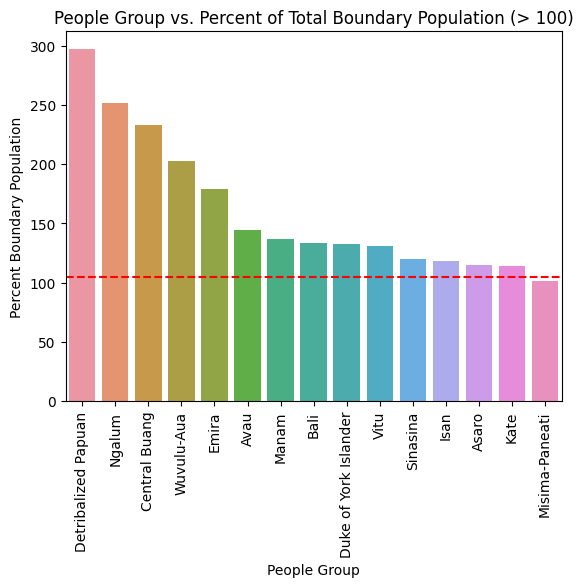

In [64]:
png_above_100 = png_sorted[png_sorted['Percent Boundary Population'] > 100]
sns.barplot(data=png_above_100, x='People Group', y='Percent Boundary Population')
plt.xticks(rotation=90);
plt.title('People Group vs. Percent of Total Boundary Population (> 100)')
plt.axhline(y=105, color='r', linestyle='--'); # 5% error

In [60]:
# number of people groups in Papua New Guinea that failed the ADM3 test
png_above_100.shape[0]

15

In [61]:
png_above_100.explore(color='red')